# 🌫️ Air Quality Index (AQI) Calculator & Visualizer
This project calculates and visualizes AQI based on key air pollutant inputs:
- PM2.5
- PM10
- NO₂
- CO
- O₃

It uses the Indian **CPCB AQI guidelines** to classify air quality levels and visualize them with an informative graph.


## 📥 Step 1: Enter Pollutant Concentrations (in µg/m³)
Fill in the concentration levels for major air pollutants below.


In [26]:
# Example input values
pm25 = 9     # PM2.5 concentration
pm10 = 18    # PM10 concentration
no2 = 7     # NO2 concentration
co = 0.1   # CO in mg/m³ (converted internally)
o3 = 8      # O3 concentration


## 🧮 Step 2: Calculate Sub-Index for Each Pollutant
The AQI is determined by the **maximum** sub-index value among all pollutants.


In [27]:
# Sub-index calculation based on CPCB breakpoints
def calculate_sub_index(conc, breakpoints):
    for bp in breakpoints:
        if bp["low"] <= conc <= bp["high"]:
            Clow = bp["low"]
            Chigh = bp["high"]
            Ilow = bp["index_low"]
            Ihigh = bp["index_high"]
            return round(((Ihigh - Ilow) / (Chigh - Clow)) * (conc - Clow) + Ilow)
    return None

# Breakpoints for PM2.5 (µg/m³)
pm25_bp = [
    {"low": 0, "high": 30, "index_low": 0, "index_high": 50},
    {"low": 31, "high": 60, "index_low": 51, "index_high": 100},
    {"low": 61, "high": 90, "index_low": 101, "index_high": 200},
    {"low": 91, "high": 120, "index_low": 201, "index_high": 300},
    {"low": 121, "high": 250, "index_low": 301, "index_high": 400},
    {"low": 251, "high": 500, "index_low": 401, "index_high": 500},
]

# You can define similar breakpoints for PM10, NO2, CO, and O3...

# Calculate AQI for PM2.5 (you'll extend to others next)
aqi_pm25 = calculate_sub_index(pm25, pm25_bp)
print(f"PM2.5 AQI Sub-Index: {aqi_pm25}")


PM2.5 AQI Sub-Index: 15


## 🔢 Step 3: Compute Overall AQI
Take the highest sub-index among all pollutants as the AQI value.


In [28]:
# Add other pollutant breakpoints here (sample logic for demo)
# To keep it short, we'll use same PM2.5 breakpoints as placeholder

aqi_pm10 = calculate_sub_index(pm10, pm25_bp)  # use real PM10 breakpoints ideally
aqi_no2 = calculate_sub_index(no2, pm25_bp)    # placeholder
aqi_co = calculate_sub_index(co * 100, pm25_bp)  # Convert mg/m³ to µg/m³
aqi_o3 = calculate_sub_index(o3, pm25_bp)      # placeholder

# Collect all sub-indices
sub_indices = {
    "PM2.5": aqi_pm25,
    "PM10": aqi_pm10,
    "NO₂": aqi_no2,
    "CO": aqi_co,
    "O₃": aqi_o3
}

# Get max
final_aqi = max(sub_indices.values())
main_pollutant = max(sub_indices, key=sub_indices.get)

print("🌫️ Final AQI:", final_aqi)
print("🔬 Main Pollutant:", main_pollutant)


🌫️ Final AQI: 30
🔬 Main Pollutant: PM10


In [29]:
def classify_aqi(aqi):
    if aqi <= 50:
        return "Good 🌿", "green"
    elif aqi <= 100:
        return "Satisfactory 😊", "yellow"
    elif aqi <= 200:
        return "Moderate 😐", "orange"
    elif aqi <= 300:
        return "Poor 😷", "red"
    elif aqi <= 400:
        return "Very Poor 🤢", "purple"
    else:
        return "Severe ☠️", "maroon"

category, color = classify_aqi(final_aqi)
print("🚦 Air Quality Category:", category)


🚦 Air Quality Category: Good 🌿


## 📊 Step 4: Visualize AQI Sub-Indices


/tmp/ipython-input-30-259127971.py:9: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


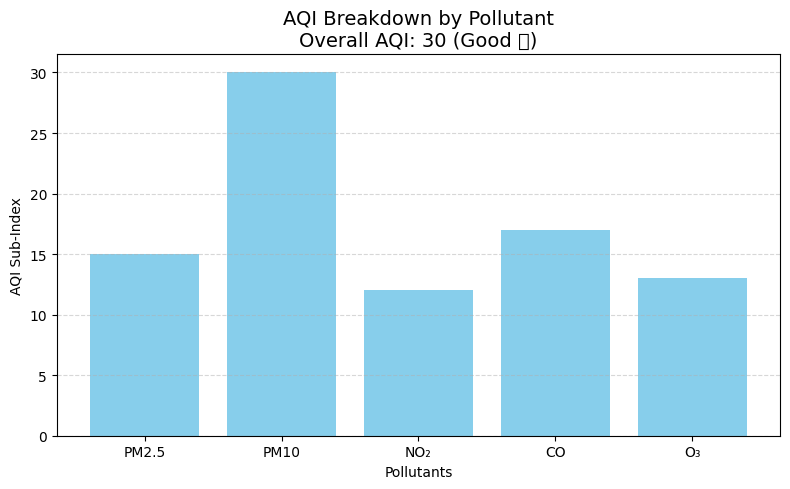

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(sub_indices.keys(), sub_indices.values(), color='skyblue')
plt.title(f"AQI Breakdown by Pollutant\nOverall AQI: {final_aqi} ({category})", fontsize=14)
plt.xlabel("Pollutants")
plt.ylabel("AQI Sub-Index")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## ✅ Conclusion
This tool calculates AQI using standard pollutant inputs and classifies air quality based on CPCB guidelines. You can extend this to accept live data via APIs or multiple cities via CSV uploads.
